In [1]:
from fastbook import *
from fastai.vision.widgets import *
from io import BytesIO
from PIL import Image
import pandas as pd
import requests

/home/henry/.local/share/mamba/envs/movieai/lib/python3.10/site-packages/fastbook/__init__.py:13: UserWarning: Missing `sentencepiece` - please run `pip install 'sentencepiece<0.1.90'`
  except ModuleNotFoundError: warn("Missing `sentencepiece` - please run `pip install 'sentencepiece<0.1.90'`")


In [2]:
# Load CSV into DataFrame
movie_df = pd.read_csv("MovieGenre.csv", encoding='latin').dropna(subset=['Poster', 'Genre'])
movie_df.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,"https://images-na.ssl-images-amazon.com/images/M/MV5BMDU2ZWJlMjktMTRhMy00ZTA5LWEzNDgtYmNmZTEwZTViZWJkXkEyXkFqcGdeQXVyNDQ2OTk4MzI@._V1_UX182_CR0,0,182,268_AL_.jpg"
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,"https://images-na.ssl-images-amazon.com/images/M/MV5BZTk2ZmUwYmEtNTcwZS00YmMyLWFkYjMtNTRmZDA3YWExMjc2XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UY268_CR10,0,182,268_AL_.jpg"
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BMjQxM2YyNjMtZjUxYy00OGYyLTg0MmQtNGE2YzNjYmUyZTY1XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg"
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BMTczMTMyMTgyM15BMl5BanBnXkFtZTcwOTc4OTQyMQ@@._V1_UY268_CR4,0,182,268_AL_.jpg"
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BOTEyNzg5NjYtNDU4OS00MWYxLWJhMTItYWU4NTkyNDBmM2Y0XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg"


In [3]:
# 1. Get list of frequent genres
genre_counts = movie_df['Genre'].str.split('|').explode().value_counts()
frequent_genres = set(genre_counts[genre_counts >= 50].index)

# Function to clean the strings of rare genres
def filter_rare_genres(genre_str):
    if not isinstance(genre_str, str): 
        return None

    # Keep only the genres that are in our frequent list
    genres = [g for g in genre_str.split('|') if g in frequent_genres]

    # Return the cleaned string, or None if no frequent genres remain
    return '|'.join(genres) if genres else None

# Apply the cleaning function
movie_df['Genre'] = movie_df['Genre'].apply(filter_rare_genres)

# Drop any rows that now have no genres left
movie_df = movie_df.dropna(subset=['Genre'])

In [4]:
# Create subset of random movies per genre
balanced_list = []

for genre in frequent_genres:
    genre_subset_df = movie_df[movie_df['Genre'].str.contains(genre)]
    n = min(len(genre_subset_df), 200)
    balanced_list.append(genre_subset_df.sample(n=n, random_state=42))

movie_subset_df = pd.concat(balanced_list).drop_duplicates(subset=['imdbId'])
movie_subset_df.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
28560,4006794,http://www.imdb.com/title/tt4006794,Tom and Jerry: The Lost Dragon (2014),6.1,Animation|Comedy|Family,"https://images-na.ssl-images-amazon.com/images/M/MV5BMTk5MjY1OTU2M15BMl5BanBnXkFtZTgwODc0NjI2MjE@._V1_UY268_CR3,0,182,268_AL_.jpg"
23038,1817287,http://www.imdb.com/title/tt1817287,Is the Man Who Is Tall Happy? (2013),7.1,Documentary|Animation,"https://images-na.ssl-images-amazon.com/images/M/MV5BMTU3MTYzMjgwM15BMl5BanBnXkFtZTgwMDkzMDY1MDE@._V1_UX182_CR0,0,182,268_AL_.jpg"
23758,1744776,http://www.imdb.com/title/tt1744776,Legend of the Boneknapper Dragon (2010),7.1,Animation|Short|Adventure,"https://images-na.ssl-images-amazon.com/images/M/MV5BZGY3N2IxMWYtYWZhNC00NjE0LWJlNDMtYzU5YzgwMzhlMzBhXkEyXkFqcGdeQXVyNjM2NTM3ODA@._V1_UY268_CR4,0,182,268_AL_.jpg"
13361,910970,http://www.imdb.com/title/tt910970,WALLåáE (2008),8.4,Animation|Adventure|Family,"https://images-na.ssl-images-amazon.com/images/M/MV5BMjExMTg5OTU0NF5BMl5BanBnXkFtZTcwMjMxMzMzMw@@._V1_UX182_CR0,0,182,268_AL_.jpg"
27948,888817,http://www.imdb.com/title/tt888817,Blue Harvest,8.3,Animation|Comedy,"https://images-na.ssl-images-amazon.com/images/M/MV5BMTg0NDc2MDg2Ml5BMl5BanBnXkFtZTgwNzQ4MDY1MjE@._V1_UY268_CR87,0,182,268_AL_.jpg"


In [5]:
# Loop through subset and download poster images
valid_rows = []
for i, row in movie_subset_df.iterrows():
    try:
        # Create path for image based on imdbId
        path = Path('data')/f"{row['imdbId']}.jpg"

        # If image isn't downloaded already, download it
        if not path.exists():
            resp = requests.get(row['Poster'], timeout=5)
            Image.open(BytesIO(resp.content)).convert('RGB').save(path)
        
        # Add row to list of valid rows
        valid_rows.append(row)
    except:
        continue

# Convert list to DataFrame
valid_sample_df = pd.DataFrame(valid_rows)

In [6]:
# Function for getting the poster image file based on its ID
def get_x(r): return Path('./data')/f"{r['imdbId']}.jpg"

# Function for getting list of genres for the poster
def get_y(r): return r['Genre'].split('|')

# Create a DataBlock for loading
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_x=get_x,
                   get_y=get_y,
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   item_tfms=Resize(224),
                   batch_tfms=aug_transforms())

In [7]:
# Create DataLoaders using the DataBlock and the validated sample DataFrame
dls = dblock.dataloaders(valid_sample_df)

# Create the CNN model and train it
learn = vision_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))

# Fit the model
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.970960,0.696846,0.607613,00:23


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.798782,0.647101,0.643778,00:27
1,0.735086,0.542148,0.743424,00:26
2,0.607573,0.379026,0.866464,00:25
3,0.472634,0.300943,0.896244,00:25
4,0.380780,0.286550,0.899279,00:25
5,0.327268,0.280517,0.899595,00:25
6,0.295125,0.278794,0.900797,00:26
7,0.273211,0.277294,0.901682,00:26
8,0.261925,0.276408,0.901682,00:27
9,0.254574,0.276347,0.901366,00:26


In [8]:
# Manual Testing

# Grab the first 'test_n' rows from the original DataFrame that don't appear in the sampled DataFrame
x = 1
test_n = 10
test_posters = []
for i, row in movie_df.iterrows():
    if row['imdbId'] not in valid_sample_df['imdbId']:
        try:
            path = Path('data/test/')/f"{row['imdbId']}.jpg"
            if not path.exists():
                resp = requests.get(row['Poster'], timeout=5)
                Image.open(BytesIO(resp.content)).convert('RGB').save(path)
                print(f"ID: {row['imdbId']} -- Title: {row['Title']} -- Genres: {row['Genre']}")
                
                # Add path to list
                test_posters.append([row['Title'], path])

                # Loop until 'test_n' num rows are found
                if x == test_n:
                    break
                else:
                    x += 1
                    continue
        except:
            continue




ID: 114571 -- Title: Stuart Saves His Family (1995) -- Genres: Comedy|Drama
ID: 111333 -- Title: The Swan Princess (1994) -- Genres: Animation|Comedy|Family
ID: 111112 -- Title: The Secret of Roan Inish (1994) -- Genres: Drama|Family|Fantasy
ID: 111282 -- Title: Stargate (1994) -- Genres: Action|Adventure|Sci-Fi
ID: 111070 -- Title: The Santa Clause (1994) -- Genres: Comedy|Drama|Family
ID: 111149 -- Title: Shallow Grave (1994) -- Genres: Crime|Thriller
ID: 108260 -- Title: Suture (1993) -- Genres: Drama|Thriller
ID: 106966 -- Title: Strawberry and Chocolate (1993) -- Genres: Comedy|Drama|Romance
ID: 114594 -- Title: Swimming with Sharks (1994) -- Genres: Comedy|Crime
ID: 111309 -- Title: The Sum of Us (1994) -- Genres: Comedy|Drama


Title: Stuart Saves His Family (1995)
Top 3 Genres: ['Documentary', 'Comedy', 'Sport']
Confidences: [0.38460785150527954, 0.3583122789859772, 0.13864527642726898]


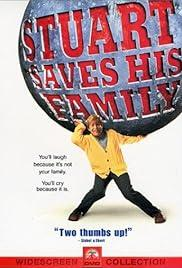

Title: The Swan Princess (1994)
Top 3 Genres: ['Animation', 'Family', 'Adventure']
Confidences: [0.9408573508262634, 0.8664180040359497, 0.8310445547103882]


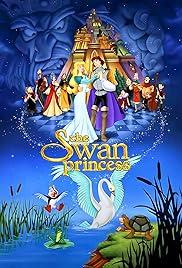

Title: The Secret of Roan Inish (1994)
Top 3 Genres: ['Drama', 'Adventure', 'Family']
Confidences: [0.6804256439208984, 0.637502133846283, 0.1967354416847229]


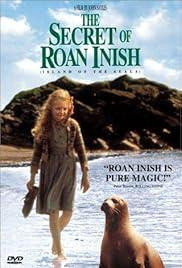

Title: Stargate (1994)
Top 3 Genres: ['Drama', 'Thriller', 'Mystery']
Confidences: [0.4412783682346344, 0.37750622630119324, 0.13673856854438782]


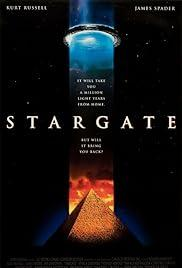

Title: The Santa Clause (1994)
Top 3 Genres: ['Comedy', 'Drama', 'Family']
Confidences: [0.7854864597320557, 0.40608176589012146, 0.22001045942306519]


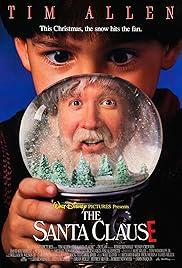

Title: Shallow Grave (1994)
Top 3 Genres: ['Drama', 'Comedy', 'Biography']
Confidences: [0.3523048758506775, 0.3365761339664459, 0.1369558870792389]


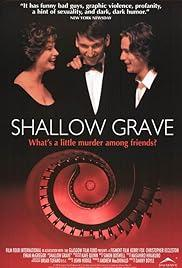

Title: Suture (1993)
Top 3 Genres: ['Drama', 'Documentary', 'Romance']
Confidences: [0.6098692417144775, 0.15434671938419342, 0.08021064847707748]


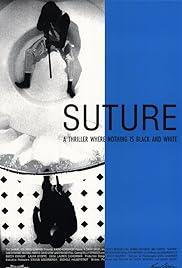

Title: Strawberry and Chocolate (1993)
Top 3 Genres: ['Drama', 'Crime', 'Action']
Confidences: [0.3800184428691864, 0.24712437391281128, 0.16247767210006714]


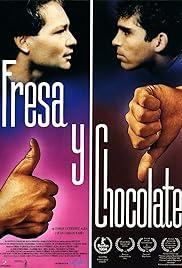

Title: Swimming with Sharks (1994)
Top 3 Genres: ['Drama', 'Comedy', 'Biography']
Confidences: [0.6521731615066528, 0.6294806599617004, 0.5469322800636292]


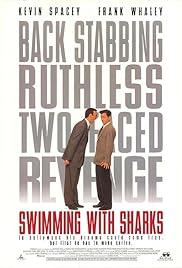

Title: The Sum of Us (1994)
Top 3 Genres: ['Drama', 'Crime', 'Thriller']
Confidences: [0.39985978603363037, 0.39921268820762634, 0.30052968859672546]


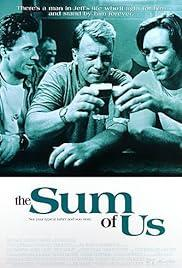

In [9]:
from IPython.display import display

for p in test_posters:

    # Get the raw probability tensor from the model
    pred_class, pred_idxs, probs = learn.predict(p[1])

    # Get the top 3 probablities and their indices
    top_probs, top_idxs = probs.topk(3)

    # Map the indices back to genre names
    top_genres = [learn.dls.vocab[i] for i in top_idxs]

    print(f"Title: {p[0]}")
    print(f"Top 3 Genres: {top_genres}")
    print(f"Confidences: {top_probs.tolist()}")
    display(Image.open(p[1]))